In [2]:
import pandas as pd
sales = pd.read_excel('Datos_examen_final_17Co2024_Grupo4.xlsx')
sales["Mes"] = sales["Fecha"].dt.month # alternativa: dt.month_name()
# sales["DiaDeSemana"] = sales["Fecha"].dt.weekday
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   365 non-null    datetime64[ns]
 1   Ventas  365 non-null    float64       
 2   Mes     365 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(1)
memory usage: 7.3 KB


## Ventas por mes en supermercado 'Santa Ana'

In [3]:
import matplotlib.pyplot as plt
import math
def plot_sales(data, plot_fun,title, n = 3, pad = 2.0, fig_size = (10,10)):
    m = math.ceil(len(data)/n)
    figure, axis = plt.subplots(m,n, figsize=fig_size)
    figure.tight_layout(pad = pad)
    for i in range(m*n):
        row = i//n
        col = i%n
        if i < len(data):
            axis[row][col].set_title(f"{title}: {i+1}")
            plot_fun(data[i], axis[row][col])
        else: 
            axis[row][col].axis('off')
            
sales_per_month = [sales[sales["Mes"] == (i+1)]["Ventas"].values for i in range(12)]

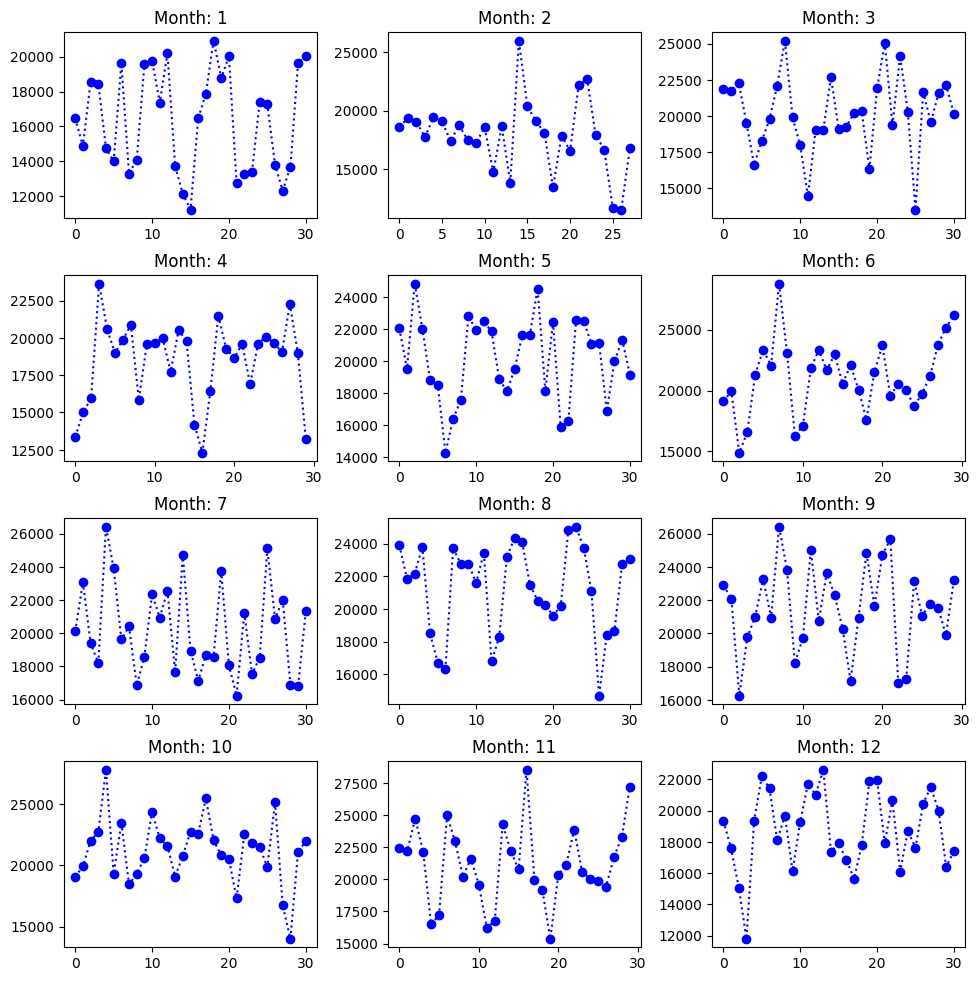

In [4]:
def month_sale_plot_fun(data, ax):    
    ax.plot(range(len(data)), data, color='blue', linestyle=':', marker='o')
plot_sales(sales_per_month,  month_sale_plot_fun , title='Month')

## 1 . Determinen intervalos de confianza empíricos para el supermercado 'Santa Ana' en cada mes, para siginificancias del 95% y el 99%.

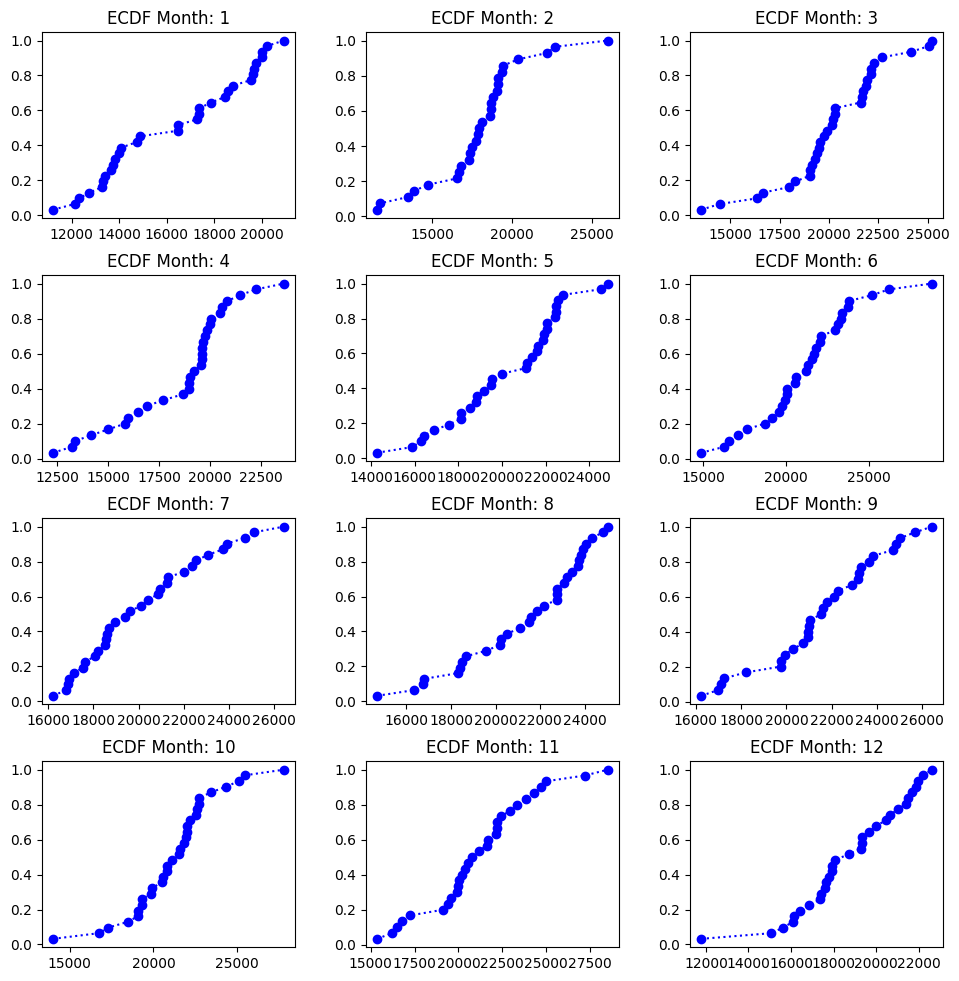

In [15]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf_per_month= list(map(lambda x: ECDF(x), sales_per_month))
def month_ecdf_plot_fun(data, ax):    
    # print('data:', data)
    ax.plot(data.x, data.y, color='blue', linestyle=':', marker='o')
plot_sales(ecdf_per_month,  month_ecdf_plot_fun , title='ECDF Month')


In [41]:
import numpy as np
import pandas as pd
df = pd.DataFrame()
alphas = [0.95, 0.99]
for alpha in alphas:
    for ecdf in ecdf_per_month:
        # asumimos que es prueba de cola izquierda
        index = -1
        for i in range(len(ecdf.y)):
            if ecdf.y[i] > alpha: 
                index = i
                break
        # print(ecdf.y[-5:])
        row = {
            'Significancia': alpha,
            'Significancia_eff': ecdf.y[index],
            'Intervalo X=(': ecdf.x[0],
            ')': ecdf.x[index]
        }
        df = pd.concat([df, pd.DataFrame([row])], ignore_index=True)         
df

,Significancia,Significancia_eff,Intervalo X=(,)
0,0.95,0.967742,-inf,20206.131479
1,0.95,0.964286,-inf,22693.388932
2,0.95,0.967742,-inf,25055.217056
3,0.95,0.966667,-inf,22273.785823
4,0.95,0.967742,-inf,24547.095905
5,0.95,0.966667,-inf,26194.222812
6,0.95,0.967742,-inf,25123.796176
7,0.95,0.967742,-inf,24813.499040
8,0.95,0.966667,-inf,25658.587310
9,0.95,0.967742,-inf,25468.284405


In [60]:
import numpy as np
import pandas as pd
from scipy.stats import norm
df = pd.DataFrame()
alphas = [0.95, 0.99]
month_names = ["January","February","March","April","May","June","July","August","September","October","November","December"]

for month_name, sales in zip(month_names, sales_per_month):
    for alpha in alphas:
        
        μ = np.mean(sales)
        σ = np.std(sales)
        new_σ = σ/np.sqrt(len(sales))
        # ppf = Φ^-1
        z = norm.ppf(alpha, loc=μ, scale=new_σ)
        row = {
            'Month': month_name,
            'alpha': alpha,
            'Intervalo X=(': '-inf',
            ')': z
        }
        df = pd.concat([df, pd.DataFrame([row])], ignore_index=True)         
display(df)

,Month,alpha,Intervalo X=(,)
0,January,0.95,-inf,17173.289055
1,January,0.99,-inf,17530.426679
2,February,0.95,-inf,18835.015598
3,February,0.99,-inf,19221.644241
4,March,0.95,-inf,20946.757185
5,March,0.99,-inf,21268.642944
6,April,0.95,-inf,19253.200904
7,April,0.99,-inf,19592.872921
8,May,0.95,-inf,20927.055478
9,May,0.99,-inf,21242.970241


## 3.

## 4. Determinen la distribución a posteriori del parámetro p de porcentaje de morosidad. Determinar su media y su varianza